In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2f}'.format
import requests
import csv
data=pd.read_csv(r"C:\Users\merie\Desktop\advdata\Insurance\insuranceClaim.csv",delimiter=',',encoding='latin1')
print(data.head())
print (len(data))

   age  sex   bmi    steps  children  smoker  region      charges  \
0   19    0 27.90  3009.00         0       1       3     1.688.49   
1   18    1 33.77  3008.00         1       0       2     1.725.55   
2   28    1 33.00  3009.00         3       0       2    4,449,462   
3   33    1 22.70 10009.00         0       0       1  21984.47061   
4   32    1 28.88  8010.00         0       0       1    3866.8552   

   insuranceclaim   DateClaim  
0               1  12/12/2019  
1               1  12/12/2019  
2               0  12/12/2019  
3               0  12/12/2019  
4               1  12/12/2019  
1338


In [108]:
#we need to split the data
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)

In [109]:
print(len(train_set))
print(len(test_set))


1070
268


In [110]:
data = train_set.copy()
print (data)

      age  sex   bmi    steps  children  smoker  region      charges  \
560    46    0 19.95  8005.00         2       0       1    9193.8385   
1285   47    0 24.32  8007.00         0       0       0    8534.6718   
1142   52    0 24.86  5008.00         0       0       2  27117.99378   
969    39    0 34.32  3004.00         5       0       2    8596.8278   
486    54    0 21.47  8000.00         3       0       1   12475.3513   
...   ...  ...   ...      ...       ...     ...     ...          ...   
1095   18    0 31.35  3010.00         4       0       0    4561.1885   
1130   39    0 23.87 10000.00         5       0       2    8582.3023   
1294   58    1 25.18  5010.00         0       0       0  11931.12525   
860    37    0 47.60  4009.00         2       1       3    46113.511   
1126   55    1 29.90  5004.00         0       0       3    10214.636   

      insuranceclaim DateClaim  
560                0       NaN  
1285               0       NaN  
1142               0       NaN  
969

In [111]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1070 entries, 560 to 1126
Data columns (total 10 columns):
age               1070 non-null int64
sex               1070 non-null int64
bmi               1069 non-null float64
steps             1062 non-null float64
children          1070 non-null int64
smoker            1070 non-null int64
region            1070 non-null int64
charges           1065 non-null object
insuranceclaim    1070 non-null int64
DateClaim         64 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 92.0+ KB
None


In [112]:
print(data.describe())

          age     sex     bmi    steps  children  smoker  region  \
count 1070.00 1070.00 1069.00  1062.00   1070.00 1070.00 1070.00   
mean    39.36    0.51   30.57  5368.53      1.11    0.21    1.51   
std     14.07    0.50    6.04  2475.14      1.22    0.40    1.12   
min     18.00    0.00   15.96  3000.00      0.00    0.00    0.00   
25%     27.00    0.00   26.22  3008.00      0.00    0.00    1.00   
50%     39.50    1.00   30.21  4007.00      1.00    0.00    2.00   
75%     51.00    1.00   34.50  8004.00      2.00    0.00    2.00   
max     64.00    1.00   53.13 10010.00      5.00    1.00    3.00   

       insuranceclaim  
count         1070.00  
mean             0.58  
std              0.49  
min              0.00  
25%              0.00  
50%              1.00  
75%              1.00  
max              1.00  


In [113]:
# from data.info() we can notice that charge is defined as object because it is considered as String in csv file because 
#the proesence of ","in the numbers 
data['charges'] = data['charges'].str.replace(',', '')
print(data['charges'])

560       9193.8385
1285      8534.6718
1142    27117.99378
969       8596.8278
486      12475.3513
           ...     
1095      4561.1885
1130      8582.3023
1294    11931.12525
860       46113.511
1126      10214.636
Name: charges, Length: 1070, dtype: object


In [114]:
# after eliminating "," from charge feature,now we proceed to change the String to the FLoat errors='coerce'
data['charges'] = pd.to_numeric(data['charges'],errors ='coerce')
#data['charges']=pd.set_option('float_format')

print(data['charges'])


560     9193.84
1285    8534.67
1142   27117.99
969     8596.83
486    12475.35
         ...   
1095    4561.19
1130    8582.30
1294   11931.13
860    46113.51
1126   10214.64
Name: charges, Length: 1070, dtype: float64


In [115]:
print(data['charges'].sum())

18594461.316309996


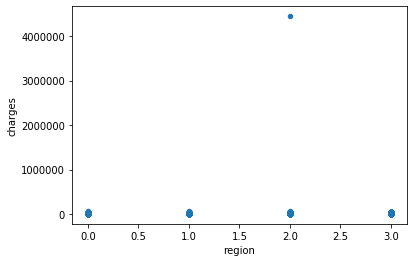

In [116]:
data.plot(kind="scatter", x="region", y="charges")

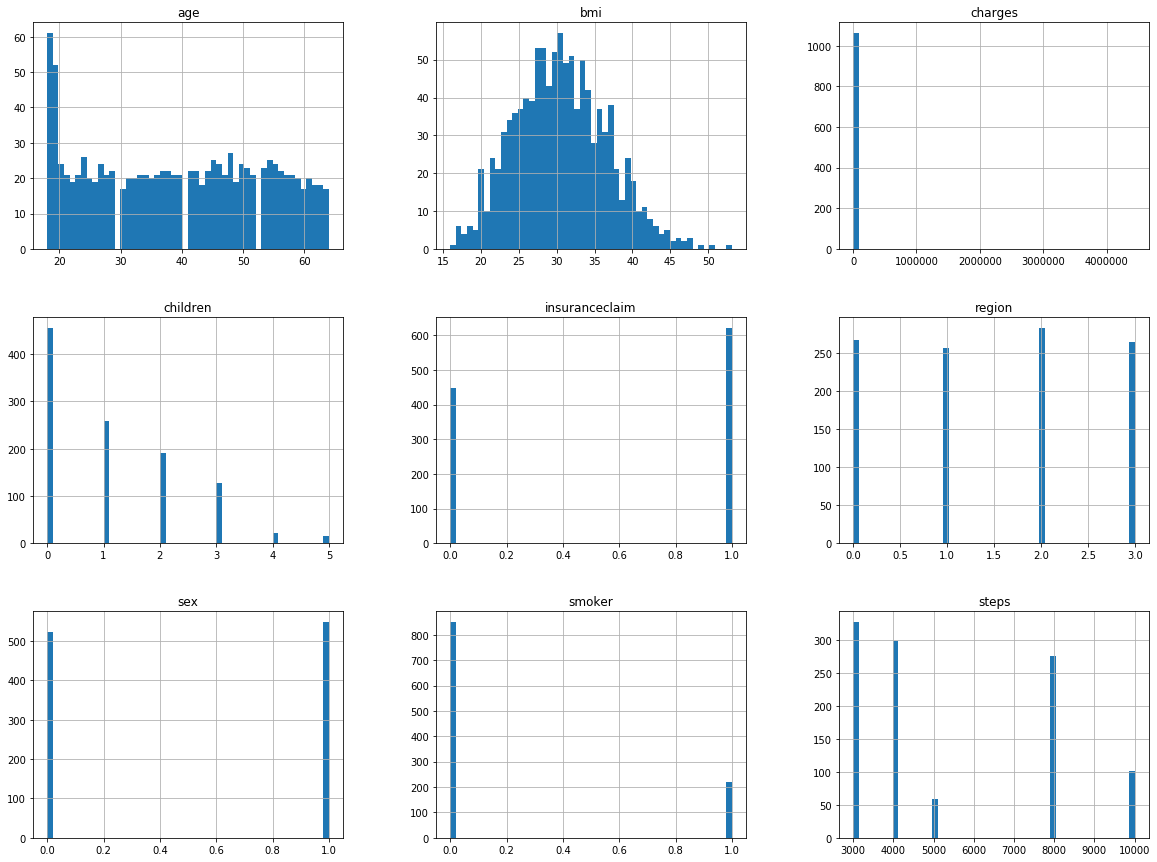

In [117]:
#A histogram for each numerical attribute
data.hist(bins=50, figsize=(20,15))
plt.show()


In [118]:
data.region[data.region == 0] = 'northeast'
data.region[data.region == 1] = 'northwest'
data.region[data.region == 2] = 'southeast'
data.region[data.region == 3] = 'southwest'
print(data) 


      age  sex   bmi    steps  children  smoker     region  charges  \
560    46    0 19.95  8005.00         2       0  northwest  9193.84   
1285   47    0 24.32  8007.00         0       0  northeast  8534.67   
1142   52    0 24.86  5008.00         0       0  southeast 27117.99   
969    39    0 34.32  3004.00         5       0  southeast  8596.83   
486    54    0 21.47  8000.00         3       0  northwest 12475.35   
...   ...  ...   ...      ...       ...     ...        ...      ...   
1095   18    0 31.35  3010.00         4       0  northeast  4561.19   
1130   39    0 23.87 10000.00         5       0  southeast  8582.30   
1294   58    1 25.18  5010.00         0       0  northeast 11931.13   
860    37    0 47.60  4009.00         2       1  southwest 46113.51   
1126   55    1 29.90  5004.00         0       0  southwest 10214.64   

      insuranceclaim DateClaim  
560                0       NaN  
1285               0       NaN  
1142               0       NaN  
969            

C:\Users\merie\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [119]:
#we need to check if we have a null value in each feature
print(data["age"].isnull().sum())
print(data["sex"].isnull().sum())
print(data["bmi"].isnull().sum())
print(data["steps"].isnull().sum())
print(data["children"].isnull().sum())
print(data["smoker"].isnull().sum())
print(data["region"].isnull().sum())
print(data["charges"].isnull().sum())
print(data["insuranceclaim"].isnull().sum())
print(data["DateClaim"].isnull().sum())



0
0
1
8
0
0
0
7
0
1006


In [120]:
corr_matrix = data.corr()
print (data.corr())
corr_matrix["charges"].sort_values(ascending=False)


                 age   sex   bmi  steps  children  smoker  charges  \
age             1.00 -0.01  0.12  -0.16      0.06   -0.05    -0.00   
sex            -0.01  1.00  0.02  -0.01      0.02    0.07     0.03   
bmi             0.12  0.02  1.00  -0.69     -0.01   -0.00     0.03   
steps          -0.16 -0.01 -0.69   1.00      0.05   -0.27    -0.06   
children        0.06  0.02 -0.01   0.05      1.00    0.01     0.05   
smoker         -0.05  0.07 -0.00  -0.27      0.01    1.00     0.05   
charges        -0.00  0.03  0.03  -0.06      0.05    0.05     1.00   
insuranceclaim  0.11  0.03  0.39  -0.43     -0.41    0.34    -0.01   

                insuranceclaim  
age                       0.11  
sex                       0.03  
bmi                       0.39  
steps                    -0.43  
children                 -0.41  
smoker                    0.34  
charges                  -0.01  
insuranceclaim            1.00  


charges           1.00
children          0.05
smoker            0.05
sex               0.03
bmi               0.03
age              -0.00
insuranceclaim   -0.01
steps            -0.06
Name: charges, dtype: float64

In [122]:
#data_num.median().values

In [123]:
 #import numpy as np
 from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values = np.nan, strategy="median")
data_num = data.drop(['region','DateClaim'], axis=1)

X = imputer.fit_transform(data_num)
#X = imputer.transform(data_num)


In [124]:
#convert the numpy array to a Dataframe
data_tr1 = pd.DataFrame(X,columns=['age', 'sex',    'bmi',   'steps',  'children', 'smoker', 'charges' ,'insuranceclaim' ])
print(data_tr1.head())

    age  sex   bmi   steps  children  smoker  charges  insuranceclaim
0 46.00 0.00 19.95 8005.00      2.00    0.00  9193.84            0.00
1 47.00 0.00 24.32 8007.00      0.00    0.00  8534.67            0.00
2 52.00 0.00 24.86 5008.00      0.00    0.00 27117.99            0.00
3 39.00 0.00 34.32 3004.00      5.00    0.00  8596.83            0.00
4 54.00 0.00 21.47 8000.00      3.00    0.00 12475.35            0.00


In [125]:
#we check if the NAN was replaced by median
print(data_tr1["bmi"].isnull().sum())
print(data_tr1["charges"].isnull().sum())


0
0


In [126]:
#we need to change region name to a number 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_cat = data["region"]
data_cat_encoded = le.fit_transform(data_cat)
data_cat_encoded

array([1, 0, 2, ..., 0, 3, 3])

In [127]:
encoder.classes_

NameError: name 'encoder' is not defined

In [128]:
#unisng the inverse code to understand how the data was labled 
list(le.inverse_transform([0,1, 2, 3]))


['northeast', 'northwest', 'southeast', 'southwest']

In [129]:
data_tr2 = pd.DataFrame(data_cat_encoded,columns=['region'] )

print (data_tr2)

      region
0          1
1          0
2          2
3          2
4          1
...      ...
1065       0
1066       2
1067       0
1068       3
1069       3

[1070 rows x 1 columns]


In [130]:
data_prepared=pd.concat([ data_tr1,data_tr2],axis=1)
data_prepared1=data_prepared
print (data_prepared)

       age  sex   bmi    steps  children  smoker  charges  insuranceclaim  \
0    46.00 0.00 19.95  8005.00      2.00    0.00  9193.84            0.00   
1    47.00 0.00 24.32  8007.00      0.00    0.00  8534.67            0.00   
2    52.00 0.00 24.86  5008.00      0.00    0.00 27117.99            0.00   
3    39.00 0.00 34.32  3004.00      5.00    0.00  8596.83            0.00   
4    54.00 0.00 21.47  8000.00      3.00    0.00 12475.35            0.00   
...    ...  ...   ...      ...       ...     ...      ...             ...   
1065 18.00 0.00 31.35  3010.00      4.00    0.00  4561.19            0.00   
1066 39.00 0.00 23.87 10000.00      5.00    0.00  8582.30            0.00   
1067 58.00 1.00 25.18  5010.00      0.00    0.00 11931.13            0.00   
1068 37.00 0.00 47.60  4009.00      2.00    1.00 46113.51            1.00   
1069 55.00 1.00 29.90  5004.00      0.00    0.00 10214.64            1.00   

      region  
0          1  
1          0  
2          2  
3          2  


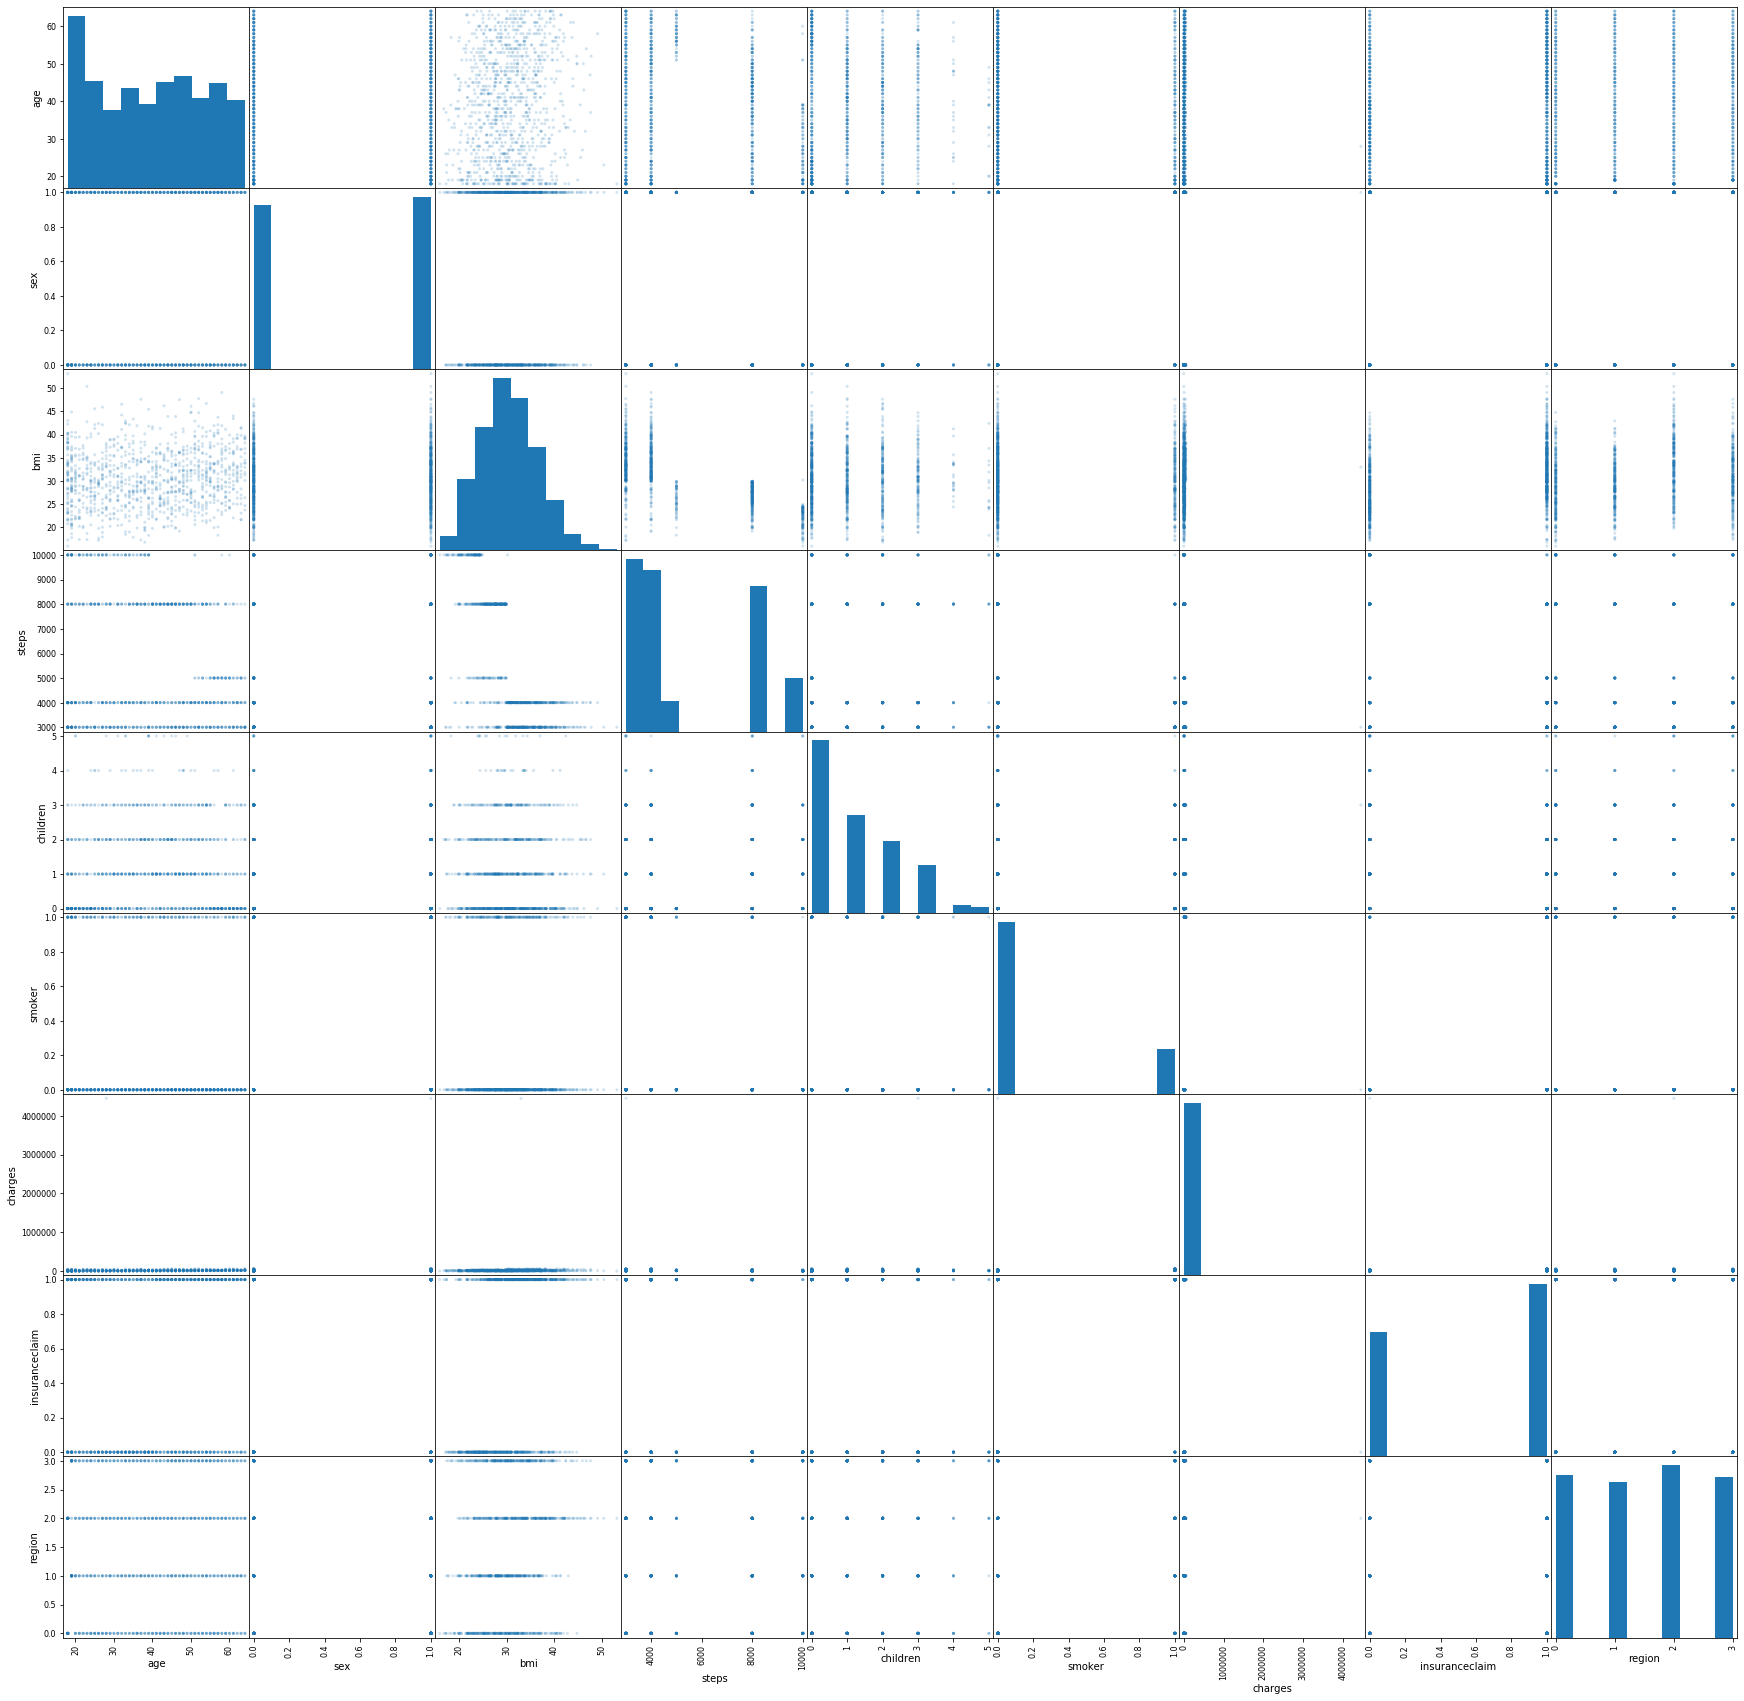

In [131]:
from pandas.plotting import scatter_matrix

pd.plotting.scatter_matrix(data_prepared, alpha=0.2, figsize=(30, 30))
plt.show()


C:\Users\merie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000250020923C8>,
      dtype=object)

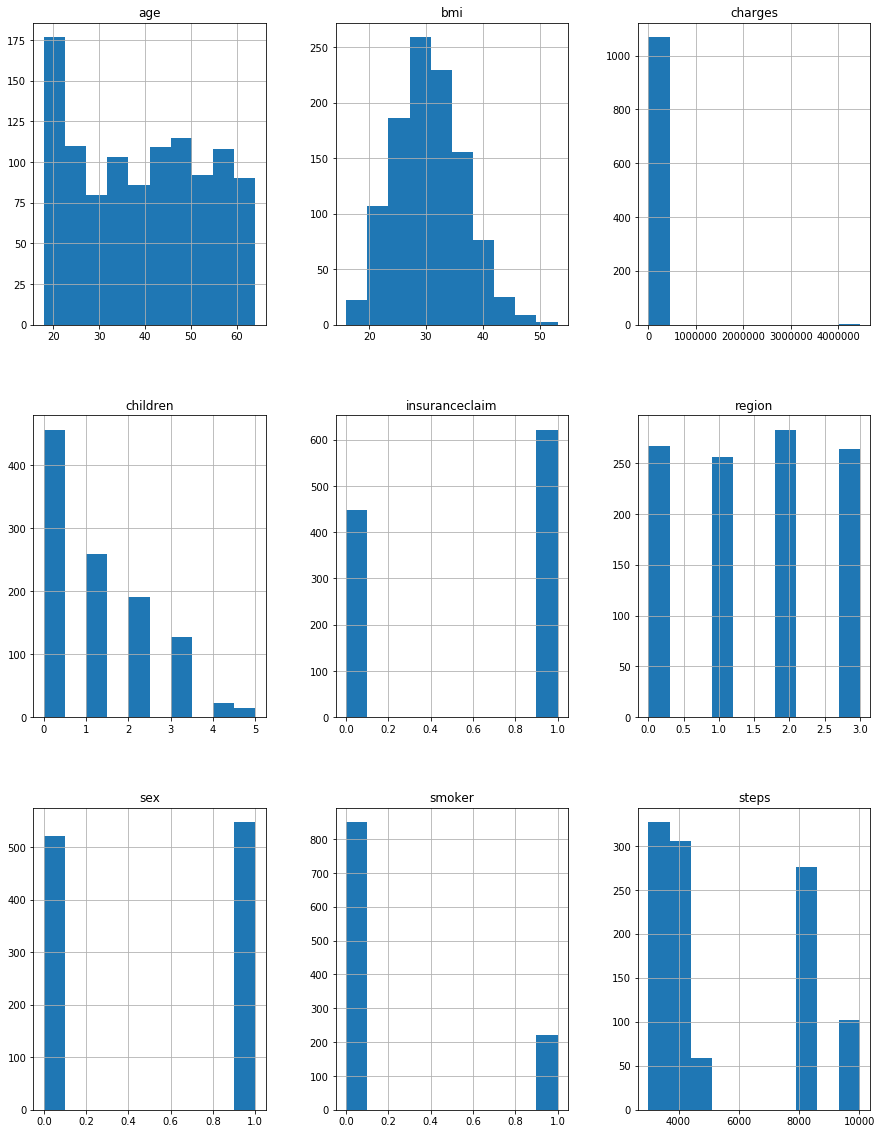

In [132]:
   fig = plt.figure(figsize = (15,20))
   ax = fig.gca()
   data_prepared.hist(ax = ax)


In [133]:
data_prepared["charges_log"] = np.log(data_prepared["charges"])
data_prepared["charges_sqrt"] = np.sqrt(data_prepared["charges"])
data_prepared["charges_cbrt"] = np.cbrt(data_prepared["charges"])
data_prepared["charges_exp"] = np.exp(data_prepared["charges"])
data_prepared["steps_log"] = np.log(data_prepared["steps"])
data_prepared["steps_sqrt"] = np.sqrt(data_prepared["steps"])
data_prepared["steps_cbrt"] = np.cbrt(data_prepared["steps"])
data_prepared["steps_exp"] = np.exp(data_prepared["steps"])

print (data_prepared)


       age  sex   bmi    steps  children  smoker  charges  insuranceclaim  \
0    46.00 0.00 19.95  8005.00      2.00    0.00  9193.84            0.00   
1    47.00 0.00 24.32  8007.00      0.00    0.00  8534.67            0.00   
2    52.00 0.00 24.86  5008.00      0.00    0.00 27117.99            0.00   
3    39.00 0.00 34.32  3004.00      5.00    0.00  8596.83            0.00   
4    54.00 0.00 21.47  8000.00      3.00    0.00 12475.35            0.00   
...    ...  ...   ...      ...       ...     ...      ...             ...   
1065 18.00 0.00 31.35  3010.00      4.00    0.00  4561.19            0.00   
1066 39.00 0.00 23.87 10000.00      5.00    0.00  8582.30            0.00   
1067 58.00 1.00 25.18  5010.00      0.00    0.00 11931.13            0.00   
1068 37.00 0.00 47.60  4009.00      2.00    1.00 46113.51            1.00   
1069 55.00 1.00 29.90  5004.00      0.00    0.00 10214.64            1.00   

      region  charges_log  charges_sqrt  charges_cbrt  charges_exp  steps_l

In [137]:
# in order to properly display Scatter Matrix and histpgram we need to drop charge_exp and step_exp since they are infinite

data_prepared = data_prepared.drop(['charges_exp','steps_exp'], axis=1)

np.isfinite(data_prepared)
np.isfinite(data_prepared).all(1)
data_prepared[np.isfinite(data_prepared).all(1)]


,age,sex,bmi,steps,children,smoker,charges,insuranceclaim,region,charges_log,charges_sqrt,charges_cbrt,steps_log,steps_sqrt,steps_cbrt
0,46.00,0.00,19.95,8005.00,2.00,0.00,9193.84,0.00,1,9.13,95.88,20.95,8.99,89.47,20.00
1,47.00,0.00,24.32,8007.00,0.00,0.00,8534.67,0.00,0,9.05,92.38,20.44,8.99,89.48,20.01
2,52.00,0.00,24.86,5008.00,0.00,0.00,27117.99,0.00,2,10.21,164.68,30.04,8.52,70.77,17.11
3,39.00,0.00,34.32,3004.00,5.00,0.00,8596.83,0.00,2,9.06,92.72,20.49,8.01,54.81,14.43
4,54.00,0.00,21.47,8000.00,3.00,0.00,12475.35,0.00,1,9.43,111.69,23.19,8.99,89.44,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,18.00,0.00,31.35,3010.00,4.00,0.00,4561.19,0.00,0,8.43,67.54,16.58,8.01,54.86,14.44
1066,39.00,0.00,23.87,10000.00,5.00,0.00,8582.30,0.00,2,9.06,92.64,20.47,9.21,100.00,21.54
1067,58.00,1.00,25.18,5010.00,0.00,0.00,11931.13,0.00,0,9.39,109.23,22.85,8.52,70.78,17.11
1068,37.00,0.00,47.60,4009.00,2.00,1.00,46113.51,1.00,3,10.74,214.74,35.86,8.30,63.32,15.89


C:\Users\merie\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  This is separate from the ipykernel package so we can avoid doing imports until


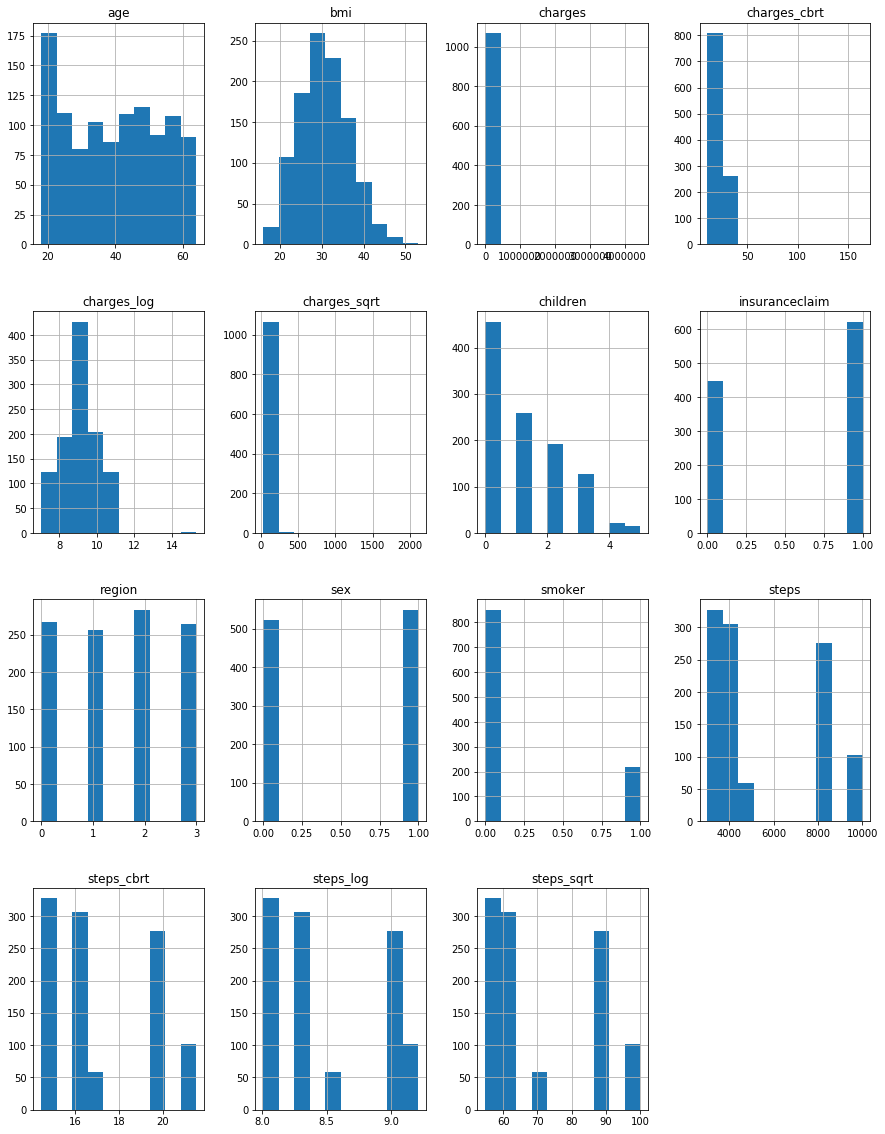

In [138]:
   fig = plt.figure(figsize = (15,20))
   ax = fig.gca()
   data_prepared.hist(ax = ax)
plt.show()


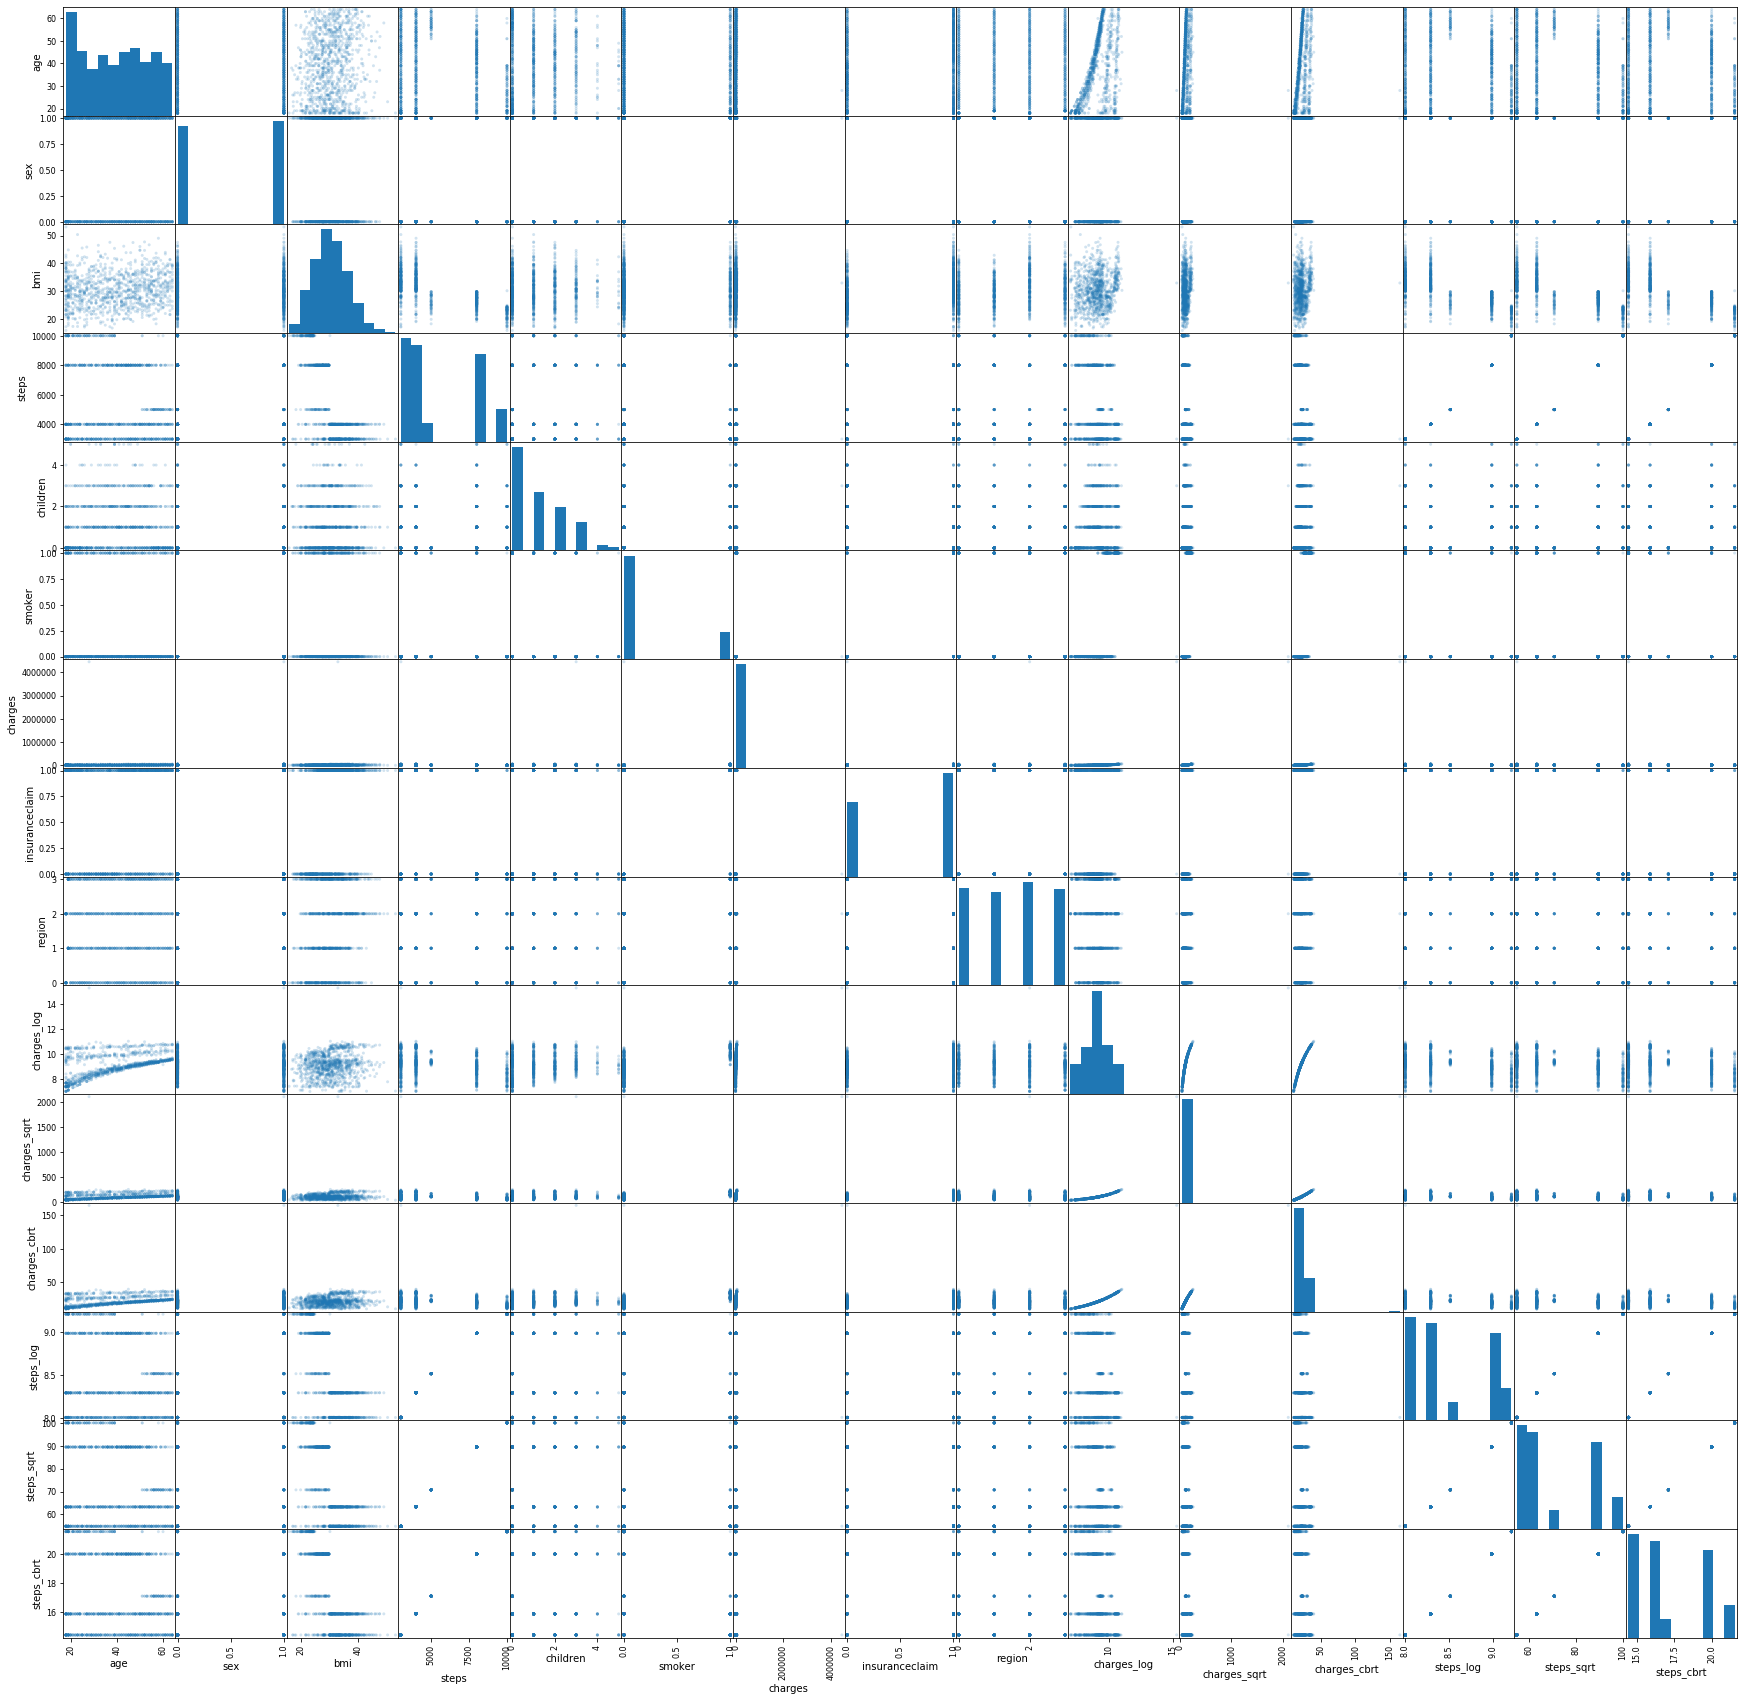

In [139]:
from pandas.plotting import scatter_matrix
pd.plotting.scatter_matrix(data_prepared,alpha=0.2, figsize=(30, 30))
plt.show()
